1. Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/winequality-red.csv')

print("Missing values:\n", df.isnull().sum())

print("\nBasic statistics:\n", df.describe())

print("\nData types:\n", df.dtypes)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Basic statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

The dataset contains 1599 entries with no missing values. All features are numerical (float64) except quality which is an integer.

Data Distribution Visualization

1. Grid layout

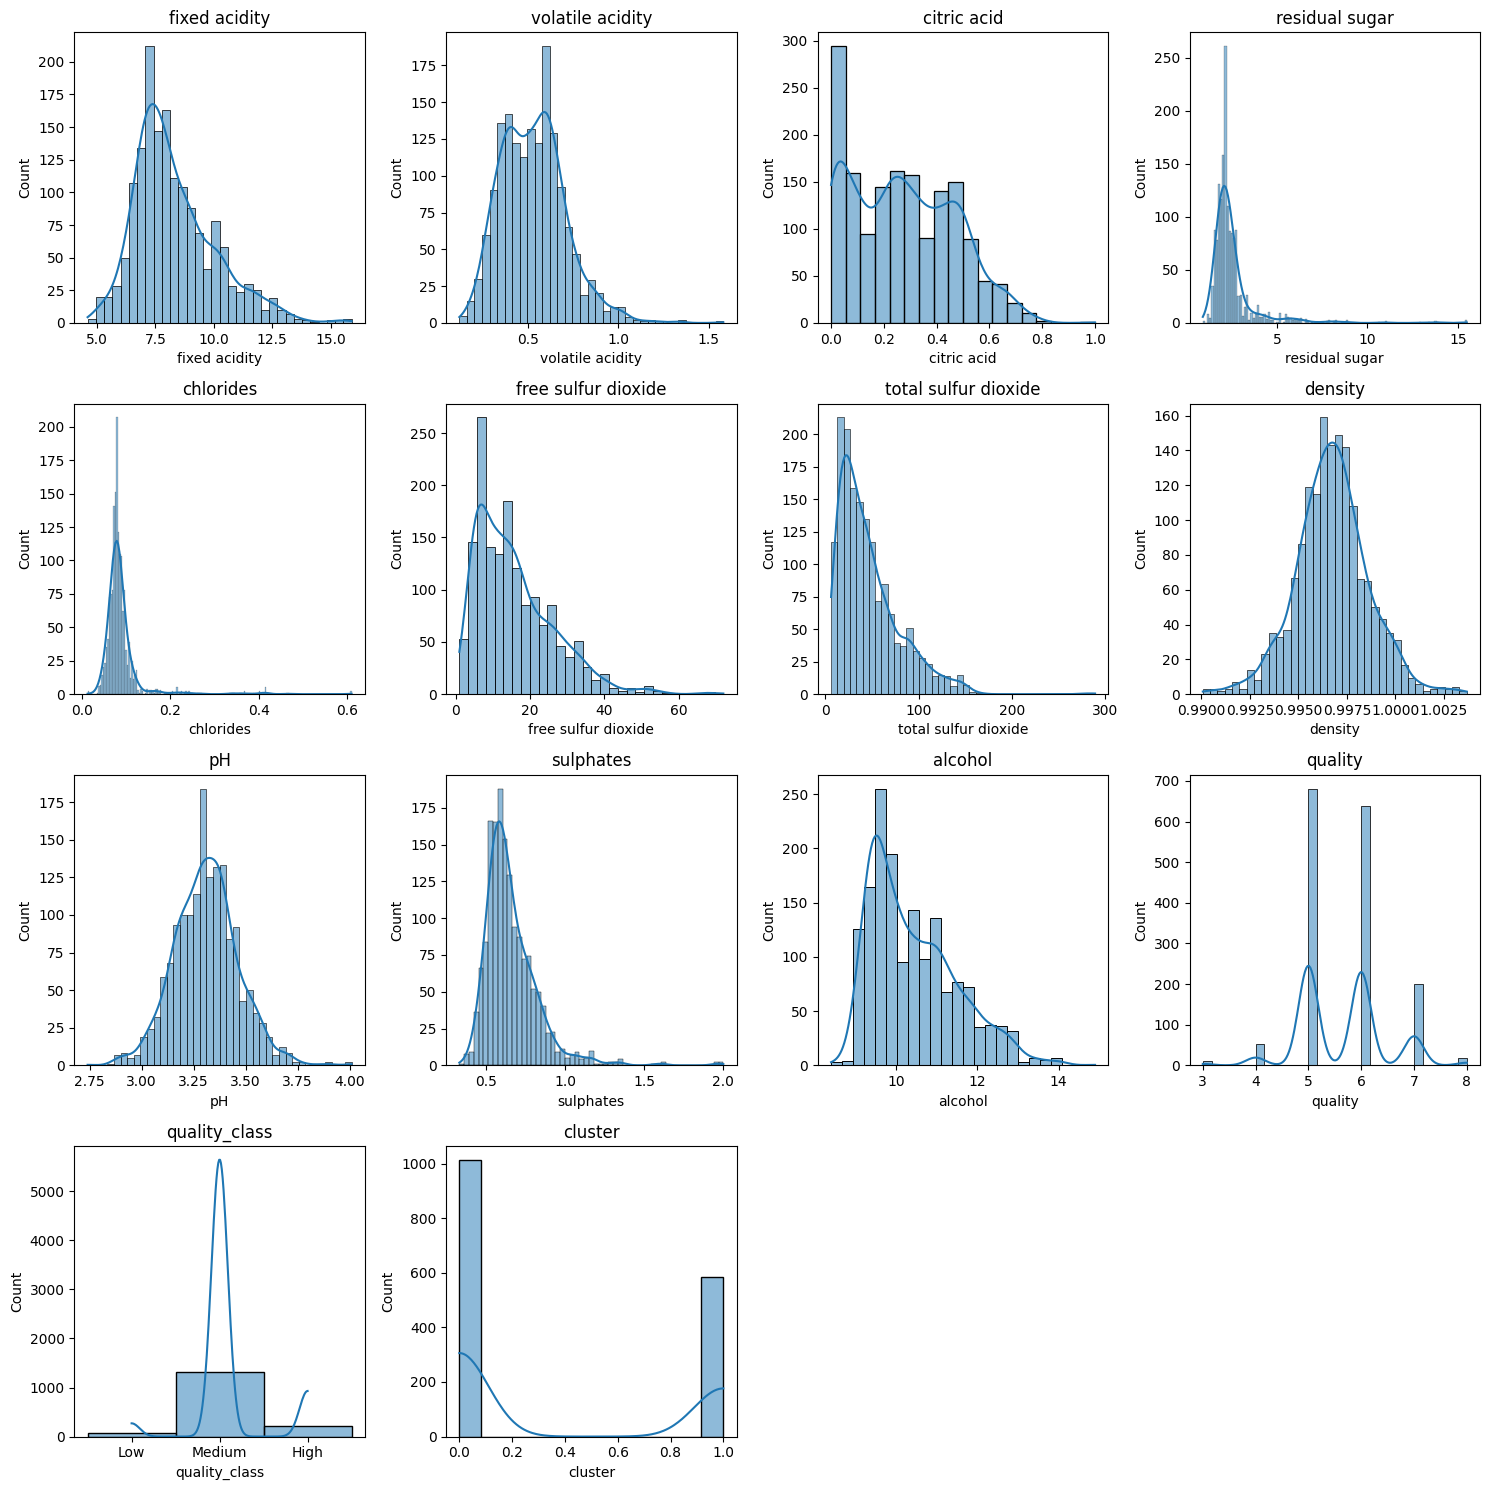

In [16]:
plt.figure(figsize=(15, 15))
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

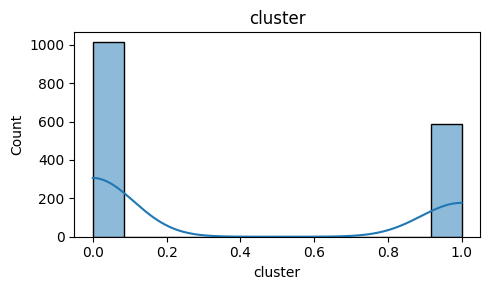

In [18]:
plt.figure(figsize=(5, 3))
sns.histplot(df[df.columns[-1]], kde=True)
plt.title(df.columns[-1])
plt.tight_layout()
plt.show()

3. Distribution of Wine Quality


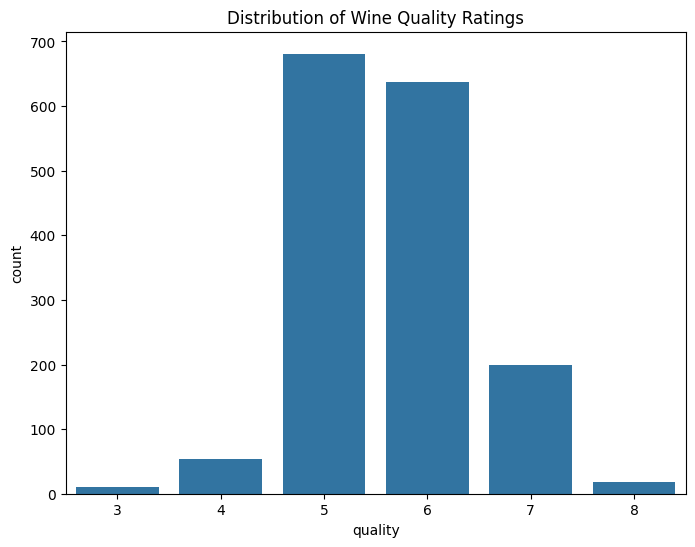

In [19]:
# Quality distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

3. Advanced EDA

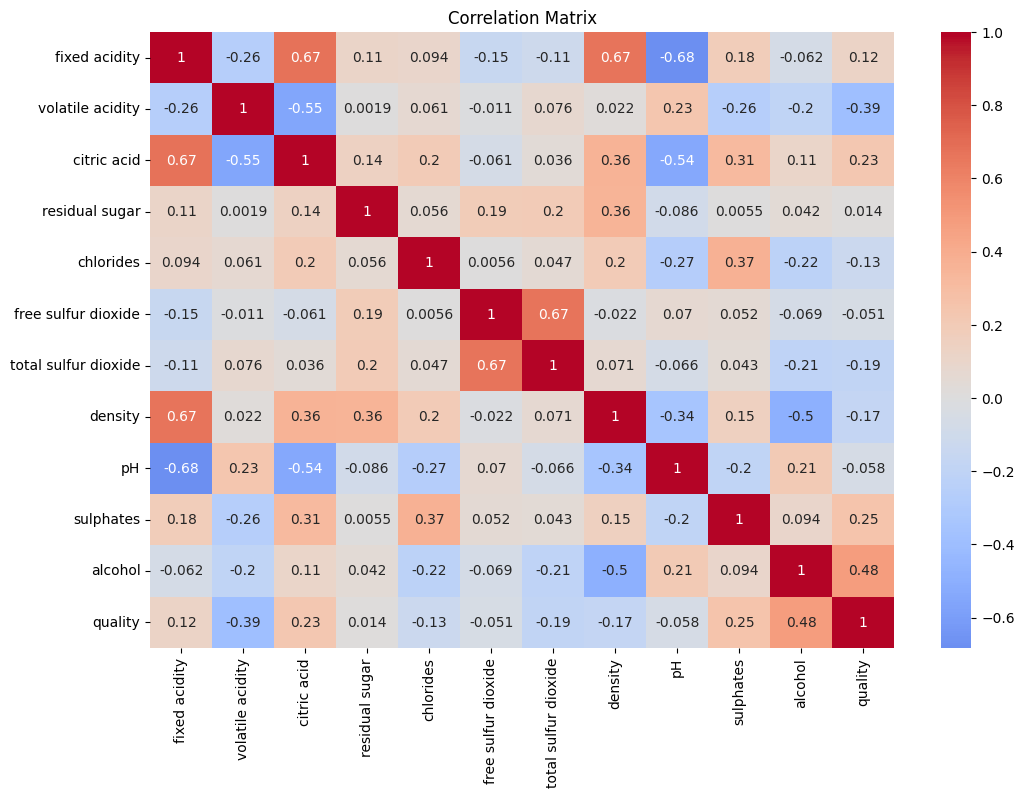


Correlation with quality:
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [3]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

quality_corr = corr['quality'].sort_values(ascending=False)
print("\nCorrelation with quality:\n", quality_corr)

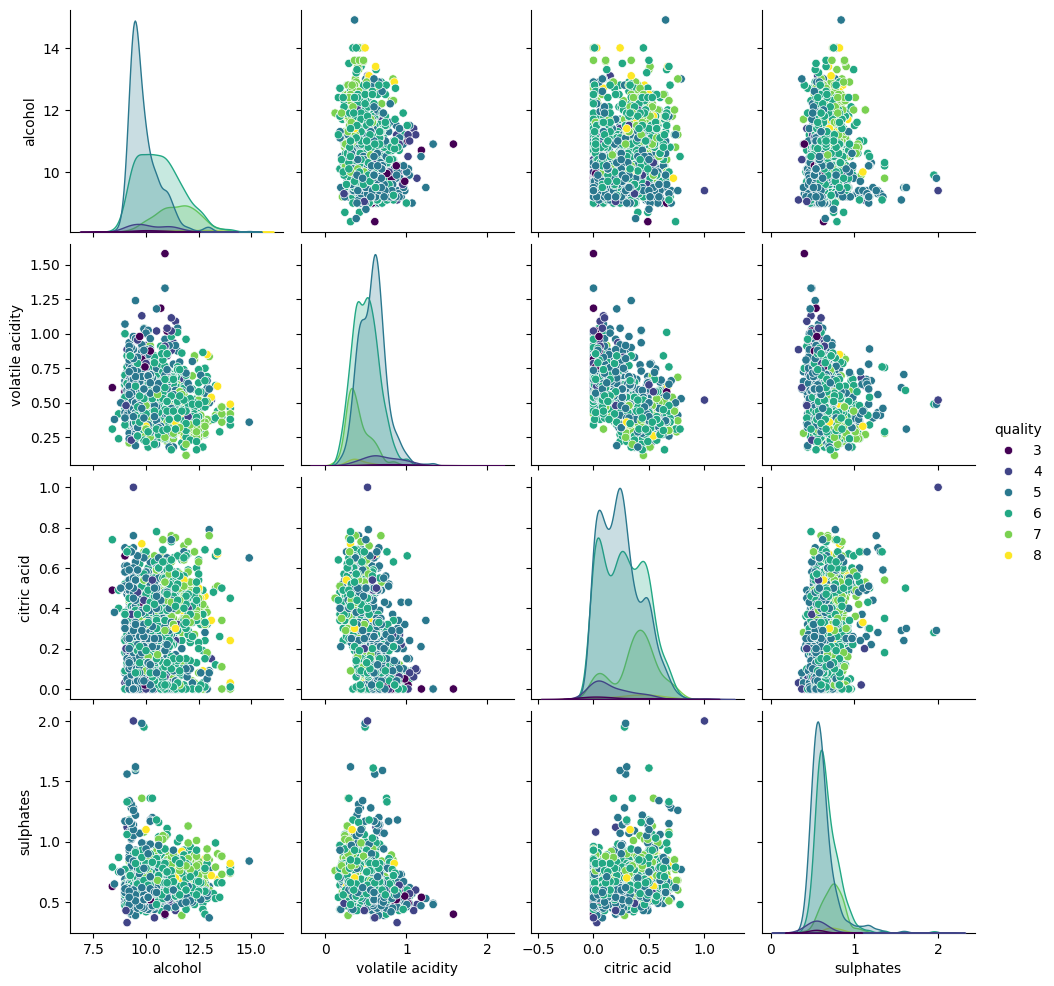

In [4]:
sns.pairplot(df[['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'quality']],
             hue='quality', palette='viridis')
plt.show()

4. Classification (Predicting Wine Quality)
Preprocessing

In [5]:
# Create quality categories (3 classes)
df['quality_class'] = pd.cut(df['quality'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'])

# Features and target
X = df.drop(['quality', 'quality_class'], axis=1)
y = df['quality_class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training and Evaluation

Accuracy: 0.865625

Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.57      0.63        47
         Low       0.00      0.00      0.00        11
      Medium       0.89      0.95      0.92       262

    accuracy                           0.87       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


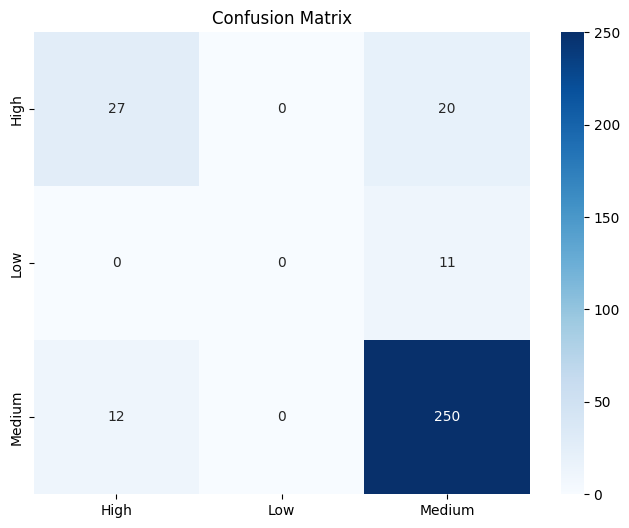

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.show()

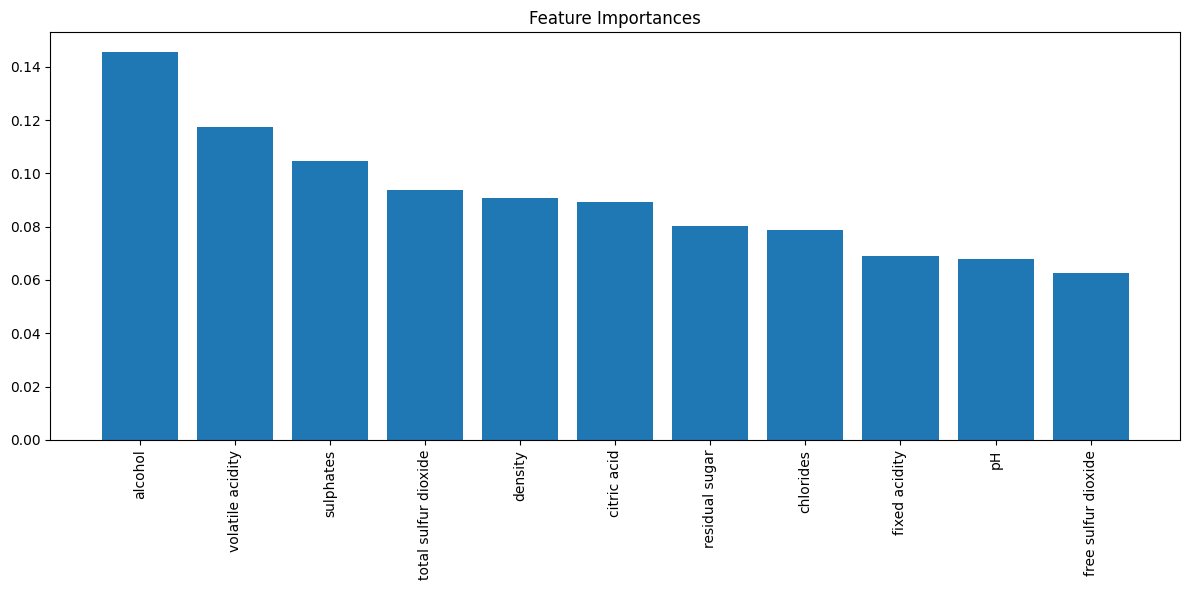

In [7]:
# Feature importance
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

5. Visualization of Decision Tree

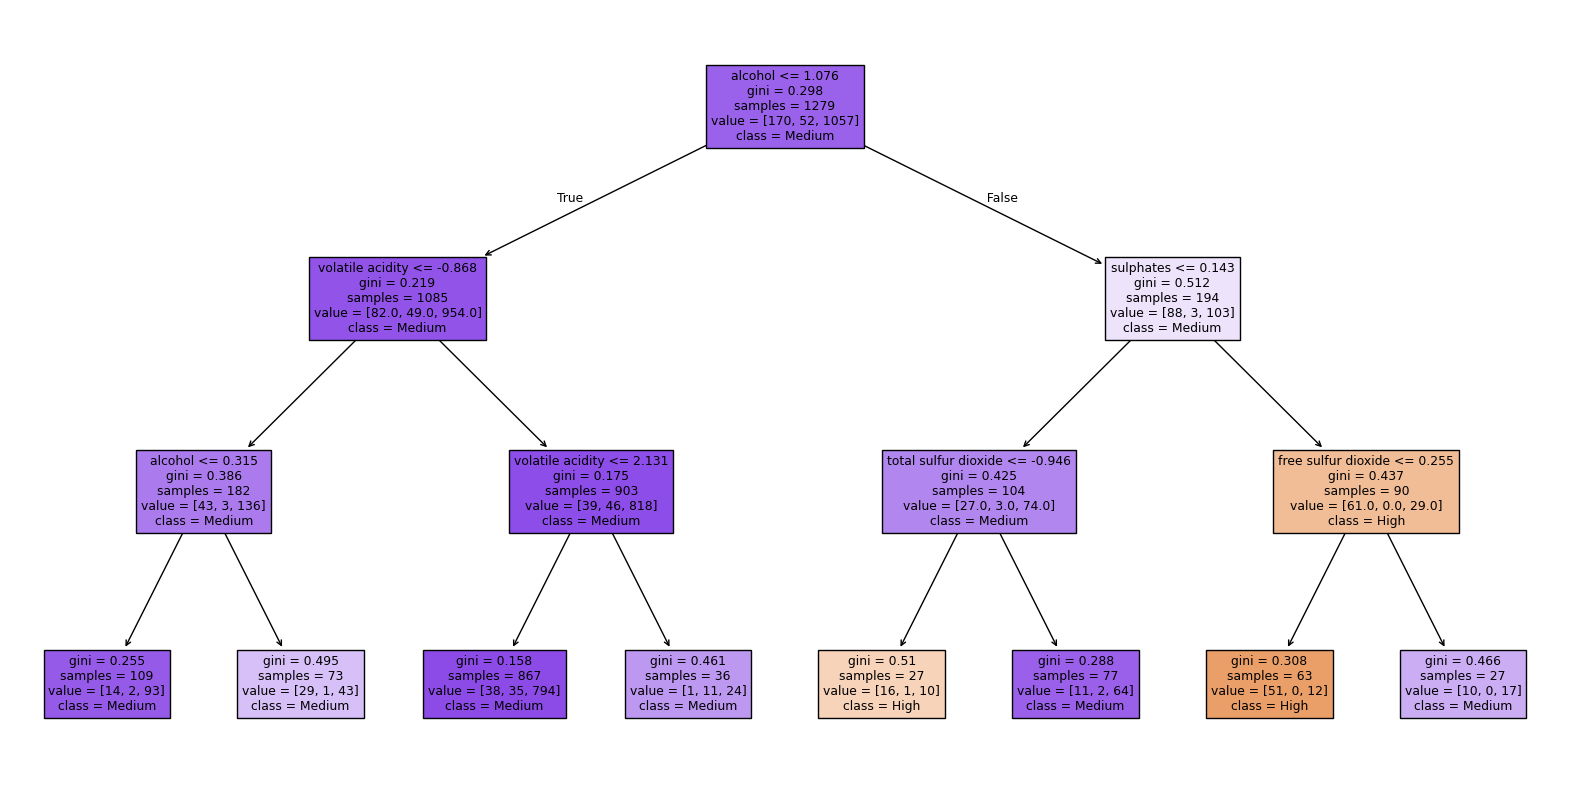

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a single decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True)
plt.show()

6. Clustering Analysis

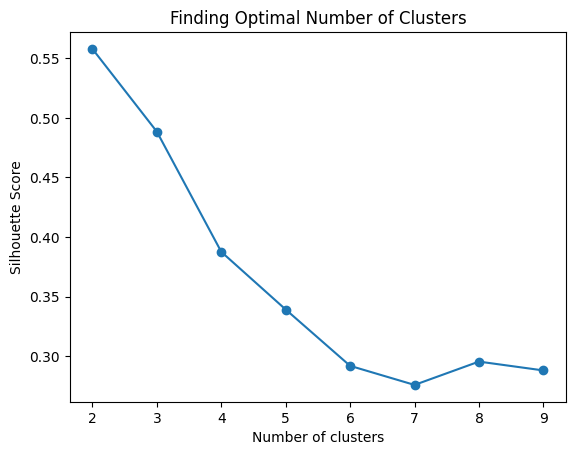

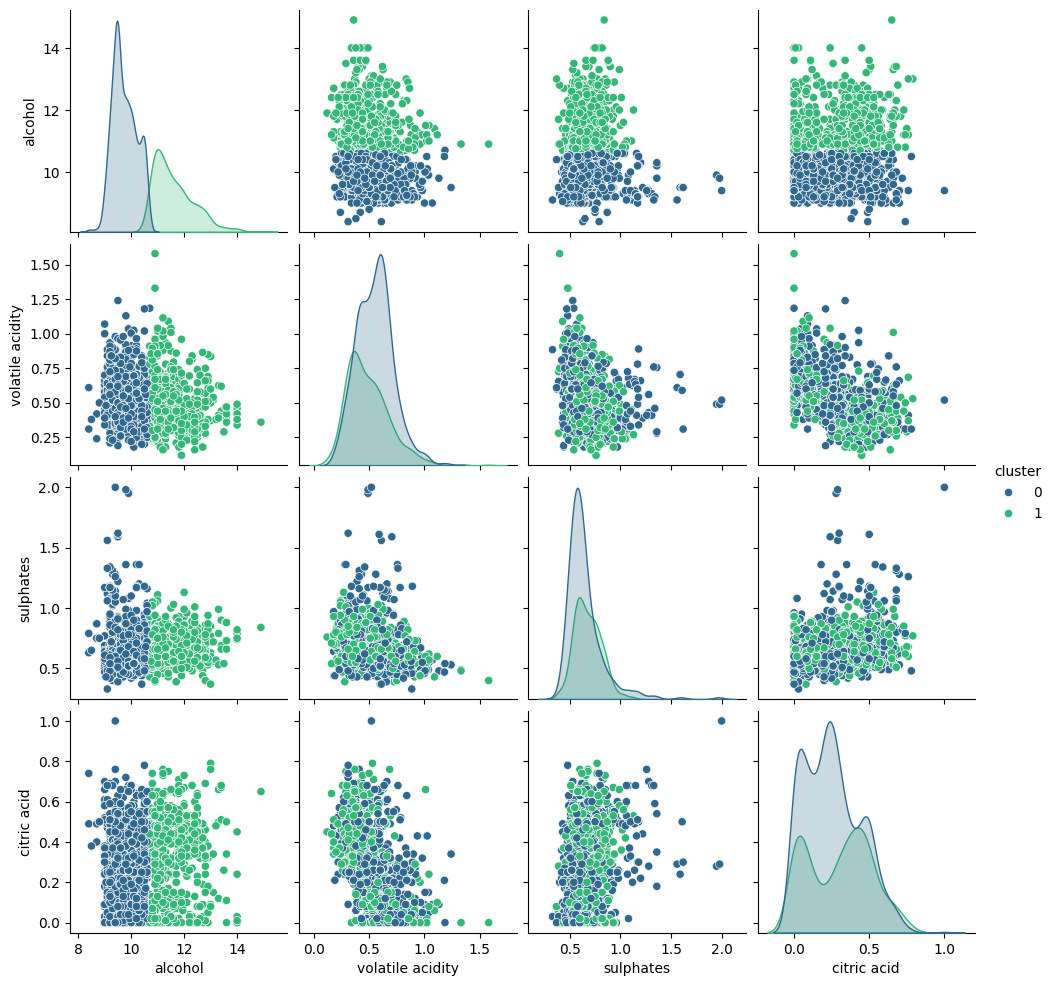

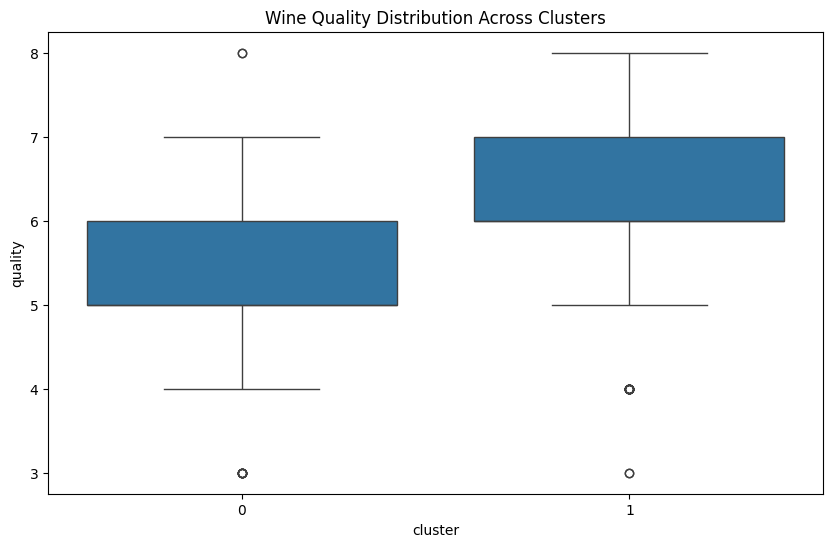

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use only the most important features for clustering
X_cluster = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']]

# Find optimal number of clusters
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    score = silhouette_score(X_cluster, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Finding Optimal Number of Clusters')
plt.show()

# Perform K-means with optimal clusters
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because range starts at 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
sns.pairplot(df, vars=['alcohol', 'volatile acidity', 'sulphates', 'citric acid'],
             hue='cluster', palette='viridis')
plt.show()

# Compare clusters with quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='quality', data=df)
plt.title('Wine Quality Distribution Across Clusters')
plt.show()

7. Association Rule Mining

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

# Discretize features into bins
df_discrete = df.copy()
for col in ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']:
    df_discrete[col] = pd.cut(df[col], bins=3, labels=[f'low_{col}', f'med_{col}', f'high_{col}'])

# Create transaction matrix
transactions = pd.get_dummies(df_discrete[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality_class']])

# Find frequent itemsets
frequent_itemsets = apriori(transactions, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top rules
print(rules.sort_values('lift', ascending=False).head(10))

                                           antecedents  \
241  (alcohol_med_alcohol, volatile acidity_low_vol...   
238  (sulphates_low_sulphates, citric acid_med_citr...   
79   (alcohol_med_alcohol, volatile acidity_low_vol...   
82                       (citric acid_med_citric acid)   
235  (sulphates_low_sulphates, alcohol_med_alcohol,...   
244                      (citric acid_med_citric acid)   
325  (citric acid_low_citric acid, sulphates_low_su...   
344  (quality_class_Medium, volatile acidity_med_vo...   
339  (citric acid_low_citric acid, alcohol_low_alco...   
330  (quality_class_Medium, sulphates_low_sulphates...   

                                           consequents  antecedent support  \
241  (sulphates_low_sulphates, citric acid_med_citr...            0.268918   
238  (alcohol_med_alcohol, volatile acidity_low_vol...            0.310194   
79                       (citric acid_med_citric acid)            0.268918   
82   (alcohol_med_alcohol, volatile acidity_low_v

8. Regression Analysis (Predicting Quality Score)

R-squared: 0.403180341279622
MSE: 0.3900251439639549

Feature coefficients:
                  Feature  Coefficient
10               alcohol     0.296628
9              sulphates     0.146815
5    free sulfur dioxide     0.058015
0          fixed acidity     0.039789
3         residual sugar     0.009421
7                density    -0.019204
2            citric acid    -0.027512
8                     pH    -0.060610
4              chlorides    -0.089084
6   total sulfur dioxide    -0.120008
1       volatile acidity    -0.179439


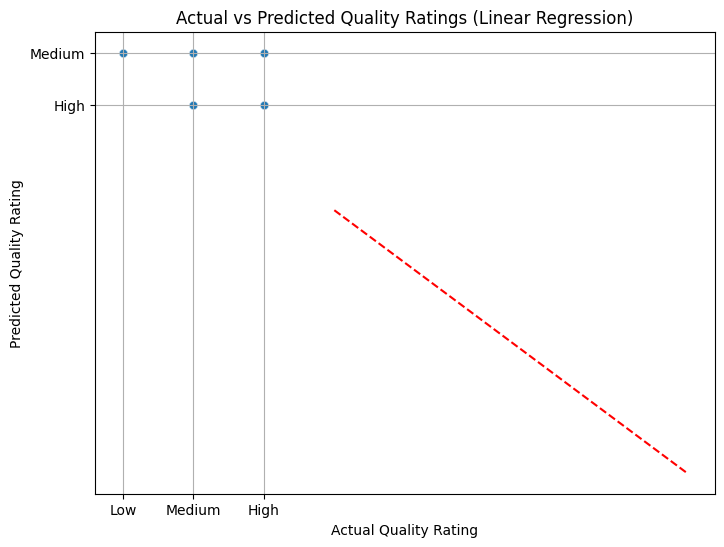

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for regression
X_reg = df.drop(['quality', 'quality_class', 'cluster'], axis=1)
y_reg = df['quality']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Train linear regression
lr = LinearRegression()
lr.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_reg = lr.predict(X_test_reg_scaled)

# Evaluation
print("R-squared:", r2_score(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))

# Feature coefficients
coefficients = pd.DataFrame({'Feature': X_reg.columns, 'Coefficient': lr.coef_})
coefficients = coefficients.sort_values('Coefficient', ascending=False)
print("\nFeature coefficients:\n", coefficients)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Actual vs Predicted Quality Ratings (Linear Regression)")
plt.plot([3, 8], [3, 8], color='red', linestyle='--')  # ideal line
plt.grid(True)
plt.show()

